# Optimization practical assignment

### Students:
- Sergio Fernández Munguía
- Iván Sotillo del Horno


## First algorithm implementation: Golden Section.

In the next cell we have implemented the golden section algorithm for a 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def golden_section(f, interval, tol):
    """
    Golden Section Search algorithm for finding the minimum of a unimodal function.
    
    Parameters
    ----------
    f : callable
        The objective function to minimize. Must accept a single float argument.
    interval : tuple
        A tuple (lower_bound, upper_bound) defining the search interval.
    tol : float
        Tolerance for termination. Algorithm stops when interval size is less than this value.
    
    Returns
    -------
    float
        The estimated position of the minimum within the interval.
    """
    lower_bound, upper_bound = interval
    golden_ratio = (1 + 5 ** 0.5) / 2
    
    # Initial probe points
    left_probe = upper_bound - (upper_bound - lower_bound) / golden_ratio
    right_probe = lower_bound + (upper_bound - lower_bound) / golden_ratio
    
    steps = 1
    while abs(upper_bound - lower_bound) > tol:
        if f(left_probe) < f(right_probe):
            upper_bound = right_probe
            right_probe = left_probe
            left_probe = upper_bound - (upper_bound - lower_bound) / golden_ratio
        else:
            lower_bound = left_probe
            left_probe = right_probe
            right_probe = lower_bound + (upper_bound - lower_bound) / golden_ratio
        steps += 1
    print(f"Steps needed: {steps}")
    return (lower_bound + upper_bound) / 2  

Now, to prove if the implementation of the algorithm is correct, we will generate some functions to test it:

$$
f(x) = \left|-x^2 + 6x -7\right|; \hspace{5mm} x \in \left[0, 3\right]
$$

$$
g(x) = \sin(3 \sqrt{x})- \frac{1}{2} \cos(x); \hspace{5mm} x \in \left[0, 10\right]
$$

In [14]:
f = lambda x: np.abs(-x ** 2 + 6 * x - 7)
g = lambda x: np.sin(3 * np.sqrt(x)) - (1/2) * np.cos(x)

def test_golden_section(functions, intervals, tol=1e-4, names=None):
    
    for i, (func, interval) in enumerate(zip(functions, intervals)):
        min_x = golden_section(func, interval, tol)
        min_y = func(min_x)
        lower, upper = interval
        x = np.linspace(lower, upper, 1000)
        y = np.array([func(xi) for xi in x])
        
        plt.figure(figsize=(10, 6))

        plt.plot(x, y, 'b-', linewidth=2, label='Function')

        plt.axvline(x=lower, color='gray', linestyle='--', alpha=0.7, label='Initial interval')
        plt.axvline(x=upper, color='gray', linestyle='--', alpha=0.7)

        plt.plot(min_x, min_y, 'ro', markersize=8, label=f'Minimum: ({min_x:.6f}, {min_y:.6f})')

        func_name = f"Function {i+1}" if names is None or i >= len(names) else names[i]
        plt.title(f"Optimization of ${func_name}$")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
        
        # Print results
        print(f"Function: {func_name}")
        print(f"Minimum found at x = {min_x:.6f}, f(x) = {min_y:.6f}")
        print("-" * 40)

Steps needed: 23


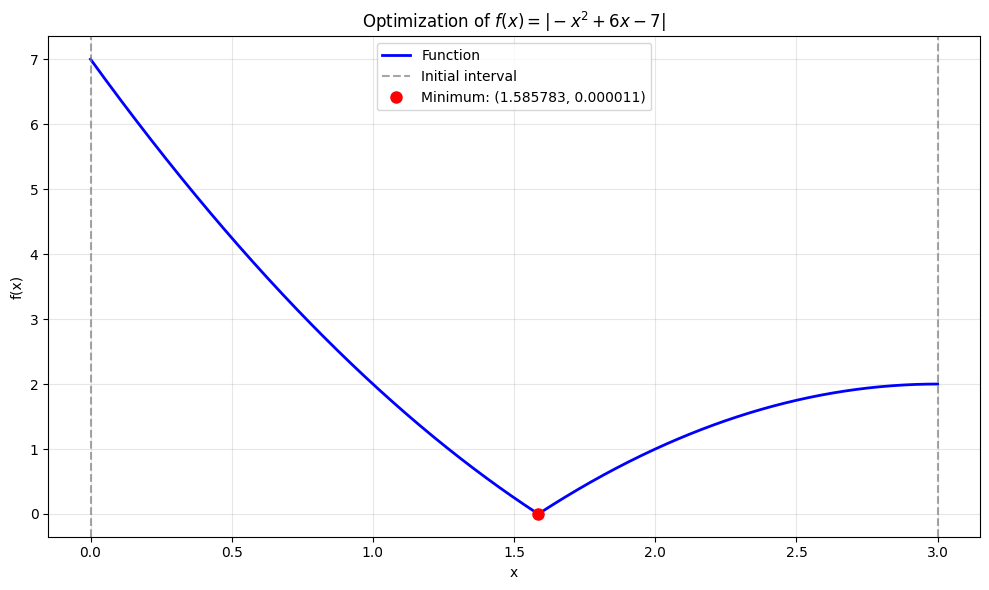

Function: f(x) = |-x^2 + 6x - 7|
Minimum found at x = 1.585783, f(x) = 0.000011
----------------------------------------
Steps needed: 25


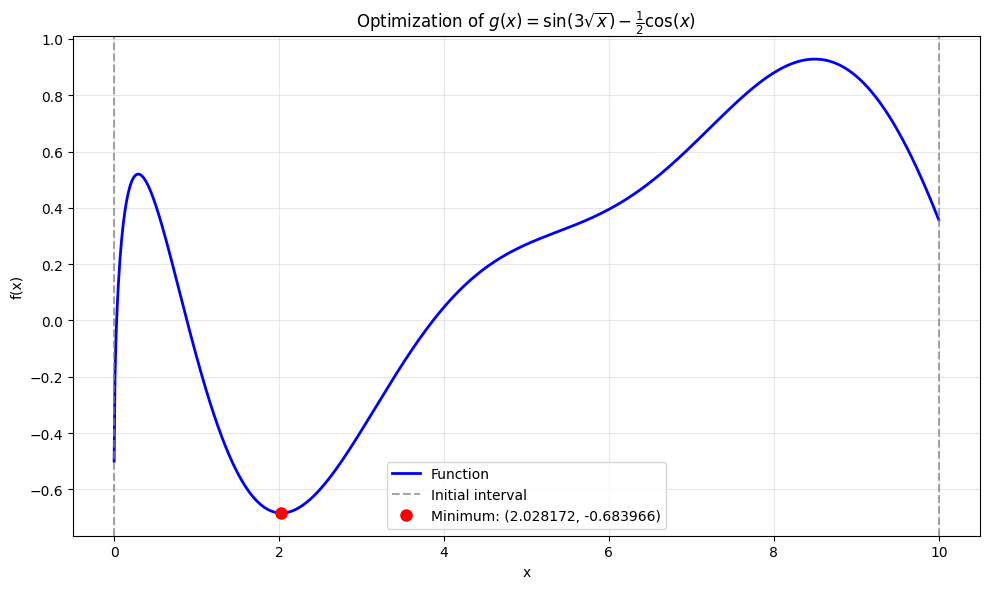

Function: g(x) = \sin(3\sqrt{x}) - \frac{1}{2}\cos(x)
Minimum found at x = 2.028172, f(x) = -0.683966
----------------------------------------


In [15]:
function_names = [
    "f(x) = |-x^2 + 6x - 7|",
    "g(x) = \\sin(3\\sqrt{x}) - \\frac{1}{2}\\cos(x)"
]

test_golden_section(
    functions=[f, g],
    intervals=[(0, 3), (0, 10)],
    names=function_names
)